In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
import pandas as pd

# Read the CSV file, skipping problematic lines
df = pd.read_csv('10_20_24/mav.csv', header=None, on_bad_lines='skip')

# Filter rows that contain the string 'imu'
filtered_df = df[df.apply(lambda row: row.astype(str).str.contains('imu').any(), axis=1)]

# Display the filtered rows
print(filtered_df)

# Optionally, save the filtered rows to a new CSV file
filtered_df.to_csv('filtered_mav.csv', index=False, header=False)

C:\Users\aymer\AppData\Local\Temp\ipykernel_31388\1494139973.py:4: DtypeWarning: Columns (3,11,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('10_20_24/mav.csv', header=None, on_bad_lines='skip')


                             0   1   2  3   4   5   6   7       8   \
32785   2024-10-20T13:08:45.473  FD  1D  0   0   E   1   1      1B   
32786   2024-10-20T13:08:45.473  FD  18  0   0   F   1   1      74   
32787   2024-10-20T13:08:45.473  FD  18  0   0  10   1   1      81   
32807   2024-10-20T13:08:45.654  FD  1D  0   0  26   1   1      1B   
32808   2024-10-20T13:08:45.654  FD  18  0   0  27   1   1      74   
...                         ...  ..  .. ..  ..  ..  ..  ..     ...   
145358  2024-10-20T13:31:02.627  FD  18  0   0  7D   1   1      74   
145359  2024-10-20T13:31:02.627  FD  18  0   0  7E   1   1      81   
145384  2024-10-20T13:31:02.866  FD  1D  0   0  97   1   1      1B   
145385  2024-10-20T13:31:02.866  FD  18  0   0  98   1   1      74   
145386  2024-10-20T13:31:02.867  FD  18  0   0  99   1   1      81   

                           9   ...     18   19     20    21     22   23    24  \
32785       mavlink_raw_imu_t  ...  xgyro   35  ygyro    66  zgyro   43  xmag 

C:\Users\aymer\AppData\Local\Temp\ipykernel_31388\545594556.py:5: DtypeWarning: Columns (3,11,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('10_20_24/mav.csv', header=None, on_bad_lines='skip')


                        field0 field1 field2 field3  field4 field5 field6  \
32785  2024-10-20T13:08:45.473     FD     1D      0       0      E      1   
32807  2024-10-20T13:08:45.654     FD     1D      0       0     26      1   
32830  2024-10-20T13:08:45.894     FD     1D      0       0     3F      1   
32853  2024-10-20T13:08:46.153     FD     1D      0       0     57      1   
32877  2024-10-20T13:08:46.435     FD     1D      0       0     71      1   

      field7  field8             field9  ... field18 field19 field20 field21  \
32785      1      1B  mavlink_raw_imu_t  ...   xgyro      35   ygyro      66   
32807      1      1B  mavlink_raw_imu_t  ...   xgyro     -74   ygyro     123   
32830      1      1B  mavlink_raw_imu_t  ...   xgyro      46   ygyro    -132   
32853      1      1B  mavlink_raw_imu_t  ...   xgyro    -128   ygyro      25   
32877      1      1B  mavlink_raw_imu_t  ...   xgyro     -79   ygyro      -8   

      field22 field23 field24 field25 field26 field27  


C:\Users\aymer\AppData\Local\Temp\ipykernel_31388\545594556.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imu_data['time_usec'] = pd.to_numeric(imu_data['field12'], errors='coerce')
C:\Users\aymer\AppData\Local\Temp\ipykernel_31388\545594556.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imu_data['xacc'] = pd.to_numeric(imu_data['field15'], errors='coerce')
C:\Users\aymer\AppData\Local\Temp\ipykernel_31388\545594556.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

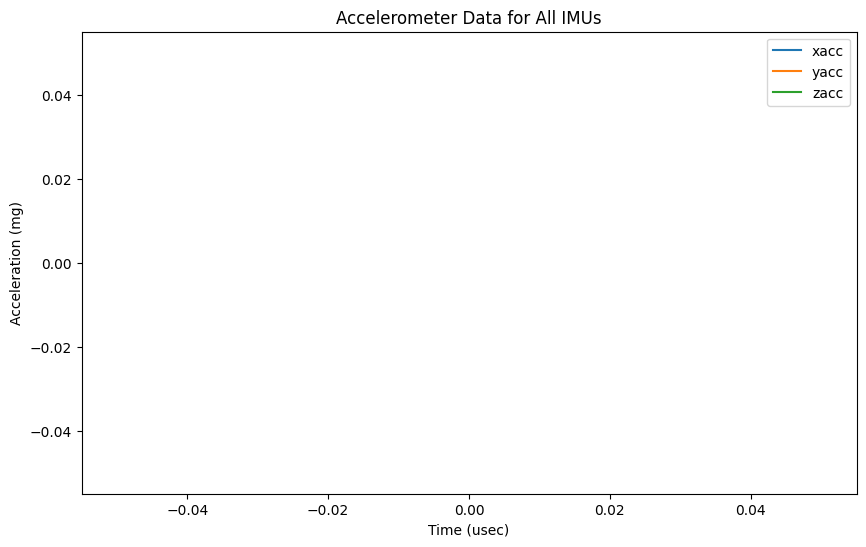

: 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file, skipping problematic lines
df = pd.read_csv('10_20_24/mav.csv', header=None, on_bad_lines='skip')

# Filter rows that contain the string 'imu'
filtered_df = df[df.apply(lambda row: row.astype(str).str.contains('imu').any(), axis=1)]

# Extract accelerometer data for each IMU
imu_data = filtered_df[filtered_df.apply(lambda row: 'mavlink_raw_imu_t' in row.astype(str).values, axis=1)]

# Dynamically generate column names based on the number of columns in the DataFrame
num_columns = imu_data.shape[1]
column_names = [f'field{i}' for i in range(num_columns)]
imu_data.columns = column_names
print(imu_data.head())

# Convert relevant columns to numeric
imu_data['time_usec'] = pd.to_numeric(imu_data['field12'], errors='coerce')
imu_data['xacc'] = pd.to_numeric(imu_data['field15'], errors='coerce')
imu_data['yacc'] = pd.to_numeric(imu_data['field17'], errors='coerce')
imu_data['zacc'] = pd.to_numeric(imu_data['field19'], errors='coerce')

# Plot the accelerometer data
plt.figure(figsize=(10, 6))

plt.plot(imu_data['time_usec'], imu_data['xacc'], label='xacc')
plt.plot(imu_data['time_usec'], imu_data['yacc'], label='yacc')
plt.plot(imu_data['time_usec'], imu_data['zacc'], label='zacc')
print(imu_data['time_usec'])

plt.title('Accelerometer Data for All IMUs')
plt.xlabel('Time (usec)')
plt.ylabel('Acceleration (mg)')
plt.legend()
plt.show()